In [1]:
import aiohttp
import asyncio
import numpy as np
import pandas as pd
from aiolimiter import AsyncLimiter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from LPInfo import RaydiumPoolInfo
from stake_layout import USER_STAKE_INFO_ACCOUNT_LAYOUT, USER_STAKE_INFO_ACCOUNT_LAYOUT_V4
from resources.ids import STAKE_PROGRAM_ID_V5, STAKE_PROGRAM_ID_V4

In [3]:
pd.options.display.float_format = '{:.5f}'.format

In [4]:
farm_inputs = [
    ('FIDA-RAY', STAKE_PROGRAM_ID_V4, USER_STAKE_INFO_ACCOUNT_LAYOUT_V4),
    ('OXY-RAY', STAKE_PROGRAM_ID_V4, USER_STAKE_INFO_ACCOUNT_LAYOUT_V4),
    ('MAPS-RAY', STAKE_PROGRAM_ID_V4, USER_STAKE_INFO_ACCOUNT_LAYOUT_V4),
    ('KIN-RAY', STAKE_PROGRAM_ID_V5, USER_STAKE_INFO_ACCOUNT_LAYOUT),
    ('COPE-USDC', STAKE_PROGRAM_ID_V5, USER_STAKE_INFO_ACCOUNT_LAYOUT),
    ('MEDIA-USDC', STAKE_PROGRAM_ID_V5, USER_STAKE_INFO_ACCOUNT_LAYOUT),
    ('STEP-USDC', STAKE_PROGRAM_ID_V5, USER_STAKE_INFO_ACCOUNT_LAYOUT)
]

In [5]:
async def amain_fusion(farm_input):
    limiter = AsyncLimiter(15, 1)
    async with aiohttp.ClientSession() as session:
        async with limiter:
            LP = RaydiumPoolInfo(session)
            staking_distro_task = asyncio.create_task(LP.get_fusion_LP_dist(*farm_input))
            staking_distro = await staking_distro_task
            
    return pd.DataFrame(staking_distro)

In [6]:
async def amain_stake():
    limiter = AsyncLimiter(15, 1)
    async with aiohttp.ClientSession() as session:
        async with limiter:
            LP = RaydiumPoolInfo(session)
            staking_distro_task = asyncio.create_task(LP.get_RAY_staking_dist())
            staking_distro = await staking_distro_task
    
    return pd.DataFrame(staking_distro)

# Fusion Pool Staking Distribution

Here, the distribution of unique addresses that have staked their LP tokens in the fusion pool is shown in histogram.

In [7]:
fusion_task = []
for farm_input in farm_inputs:
    fusion_task.append(amain_fusion(farm_input))
fusion_pool_distros = await asyncio.gather(*fusion_task)

In [8]:
def plot_loghist(x, bins, farm_name, number_offset=2, fusion=True):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.figure(figsize=(15,10))
    n, bins, patches = plt.hist(x, bins=logbins, rwidth=0.8)
    plt.xscale('log')
    
    xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
    for idx, value in enumerate(n):
        if value > 0:
            plt.text(xticks[idx], value+number_offset, int(value), ha='center', fontsize=16)
    if fusion:
        plt.title("{} Fusion Pool LP Staking Distribution".format(farm_name), fontsize=20)
    else:
        plt.title("RAY Single-sided Staking Distribution", fontsize=20)

## FIDA-RAY

In [9]:
fida_ray = fusion_pool_distros[0].set_index("publicKey")
fida_ray = fida_ray[~fida_ray.index.duplicated(keep='first')]

In [10]:
fida_ray.describe()

,Staked FIDA-RAY LP amount
count,1138.00000
mean,2374.52603
std,24007.77288
min,0.00001
25%,33.43397
50%,139.30901
75%,678.19165
max,716453.28369


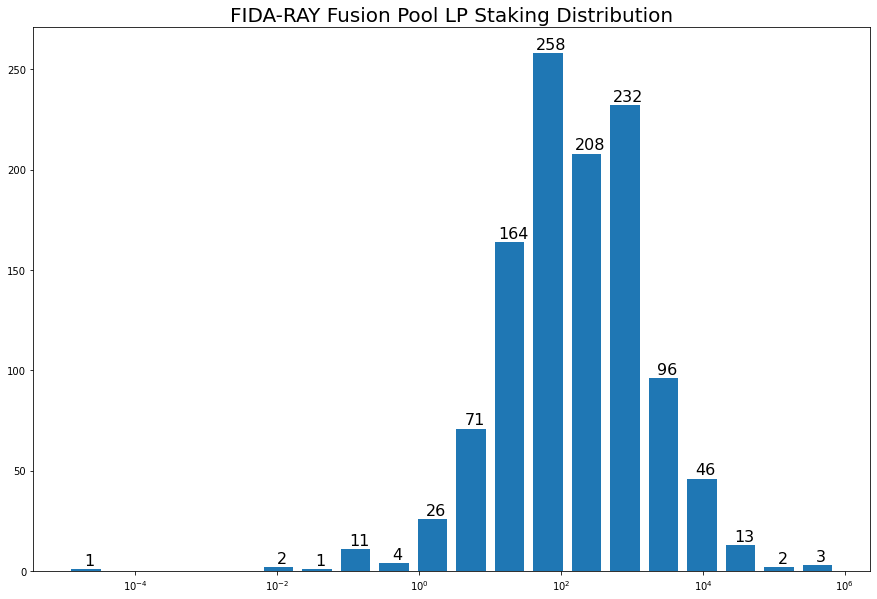

In [11]:
plot_loghist(fida_ray, 20, "FIDA-RAY")

### Top 20 FIDA-RAY Fusion Pool Whales

In [12]:
fida_ray.nlargest(20, 'Staked FIDA-RAY LP amount')

,Staked FIDA-RAY LP amount
publicKey,
6gfi6GSjrhqc5xDLtDkVrTR61Hi7GMNPmJknxvbqzb1x,716453.28369
46NAjBDQZMQ3LW6kofZkYug2kLjDeiWW6ewUFAAMsB1S,238233.10635
CuieVDEDtLo7FypA9SbLM9saXFdb1dsshEkyErMqkRQq,233709.33493
9idZBJW3jbDRtmcVcxnXyimxuWWkWcek9DUobFkuu4tZ,91348.83646
3mrFdAXXbQnGZfZRU9iMjCEbegCynT1n28NhgwjDRCUH,73266.30276
3od67CDLn9567L28GckH9yU5FCiDhKN7aJzBryeKDKtE,54714.88829
GTKJLHSZmWdRG3ZyPhvF91g6p7mr1b3z62JdtF1TkCKQ,50000.00000
B2zHBL2FfokYi1TXDtxjDWQHfp8K6156Kn8rrksew4Pp,46815.61870
3zjr9qAMWzr5NEcKigZL4AfM2pjngWUSZhjwQcwtCmGb,46701.47726


## OXY-RAY

In [13]:
oxy_ray = fusion_pool_distros[1].set_index("publicKey")
oxy_ray = oxy_ray[~oxy_ray.index.duplicated(keep='first')]

In [14]:
oxy_ray.describe()

,Staked OXY-RAY LP amount
count,1562.00000
mean,1780.49743
std,22632.07765
min,0.00051
25%,30.44441
50%,119.52171
75%,452.93790
max,835411.10882


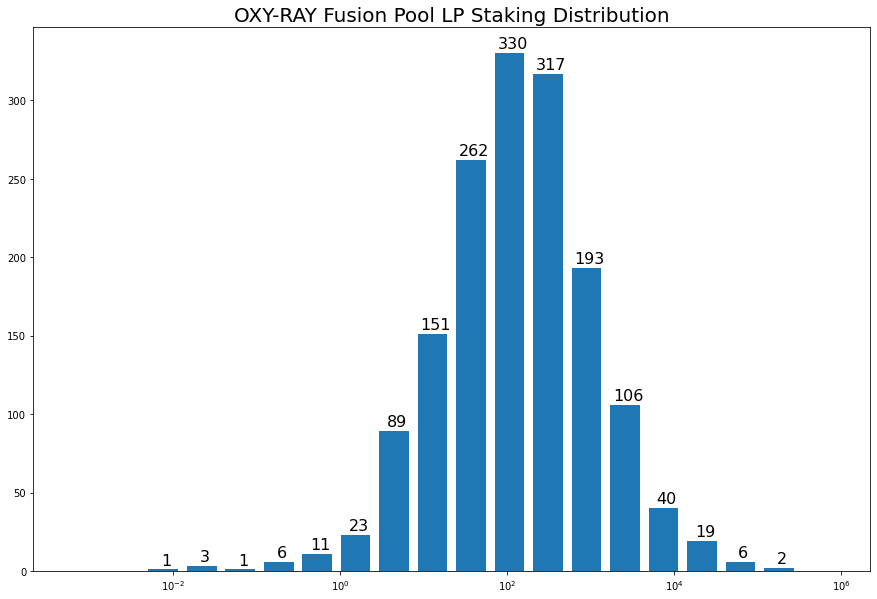

In [15]:
plot_loghist(oxy_ray, 20, "OXY-RAY", number_offset=3)

### Top 20 OXY-RAY Fusion Pool Whales 

In [16]:
oxy_ray.nlargest(20, 'Staked OXY-RAY LP amount')

,Staked OXY-RAY LP amount
publicKey,
6gfi6GSjrhqc5xDLtDkVrTR61Hi7GMNPmJknxvbqzb1x,835411.10882
46NAjBDQZMQ3LW6kofZkYug2kLjDeiWW6ewUFAAMsB1S,221895.11700
7SwnMLiu6r3JkZdCysq6g7aafgXFEQX7JTPK3aMUT8Gu,156972.87654
9tBhvGNV65AdZbZpB37duEFCAp4ke5Yo2wDFEqU5fkx4,76111.70670
4Y5hNnrMA9rSiNmV47DUTELWYdufvLi6L9ggbv8hrUFX,71011.07365
6jQ5Z5nuXvfrtEwqUqkmiEdw3ZQVWwjXpxa6ZAxzrDHn,62451.81735
76dwZ9F19uYE3wwF5NTc5GbuR6M5LwcEABA2k3gbgWoo,54357.71398
8Q7kYx1kkzBJ739J6KhLVznPixgYGJkB7NvtqZuMj6Qt,37357.73345
3TeswEr9LmLK1vbh1wpaMoz8oGTPhkZeCxCjT19YHGvC,35307.51981


## MAPS-RAY

In [17]:
maps_ray = fusion_pool_distros[2].set_index("publicKey")
maps_ray = maps_ray[~maps_ray.index.duplicated(keep='first')]

In [18]:
maps_ray.describe()

,Staked MAPS-RAY LP amount
count,852.00000
mean,155.74761
std,1464.19330
min,0.00000
25%,2.84126
50%,12.08253
75%,51.88165
max,38143.68844


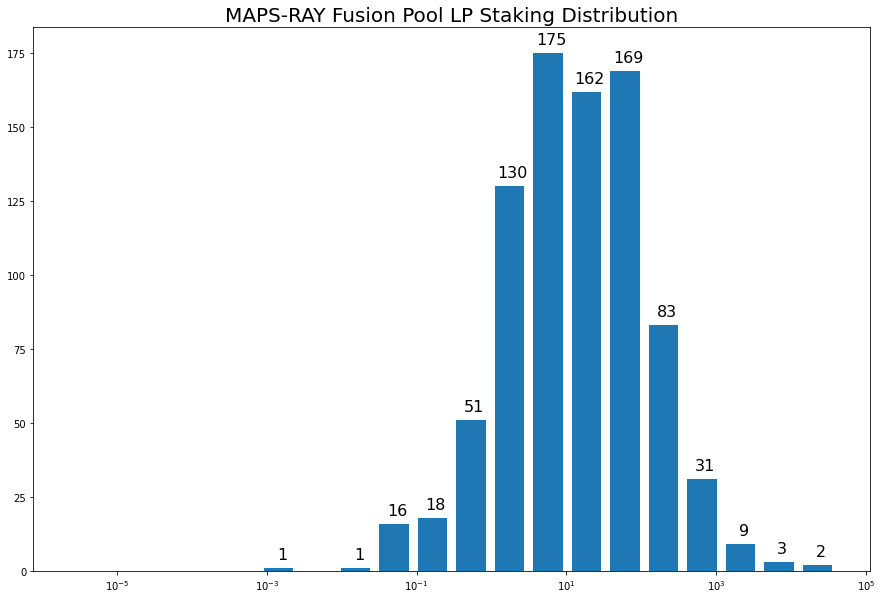

In [19]:
plot_loghist(maps_ray, 20, "MAPS-RAY", number_offset=3)

### Top 20 MAPS-RAY Fusion Pool Whales

In [20]:
maps_ray.nlargest(20, 'Staked MAPS-RAY LP amount')

,Staked MAPS-RAY LP amount
publicKey,
6gfi6GSjrhqc5xDLtDkVrTR61Hi7GMNPmJknxvbqzb1x,38143.68844
81isTzQuNaa6J1TBCjkUYWzShiPYiyxfykytgUa6byKF,15763.13194
HXnKkgvz4z3KGFn78W5D9GDqUuTnKwbE5Ty4xr1EvMFP,7008.54294
9idZBJW3jbDRtmcVcxnXyimxuWWkWcek9DUobFkuu4tZ,5209.50034
3mrFdAXXbQnGZfZRU9iMjCEbegCynT1n28NhgwjDRCUH,4900.74249
8cZ9oKLV5DHMr1x5uM16eszLSz3cC81qwJoDPZoaebGf,2742.48808
DSKqiUo59opf8XvbN9FqkFMVE31CaQNjd8hNM7TE1ra9,2056.62902
GpWvytg9NGJeQkuR3vYGipjmBD2o8tNme5EgypU8gnAX,1714.08310
4LFJZf7ovbT5uoUi5wSuioENcq6BiSnBde6n7f9ndgvi,1643.78068


## KIN-RAY 

In [21]:
kin_ray = fusion_pool_distros[3].set_index("publicKey")
kin_ray = kin_ray[~kin_ray.index.duplicated(keep='first')]

In [22]:
kin_ray.describe()

,Staked KIN-RAY LP amount
count,1443.00000
mean,2459485.15524
std,19807359.58674
min,0.00005
25%,31630.27625
50%,159093.12118
75%,792941.72650
max,678744530.76657


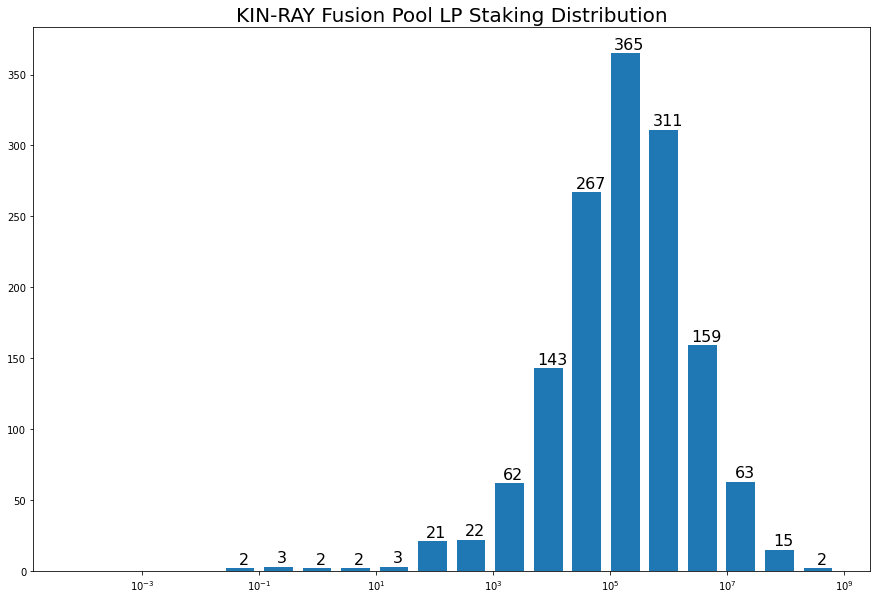

In [23]:
plot_loghist(kin_ray, 20, "KIN-RAY", number_offset=3)

### Top 20 KIN-RAY Fusion Pool Whales

In [24]:
kin_ray.nlargest(20, 'Staked KIN-RAY LP amount')

,Staked KIN-RAY LP amount
publicKey,
CuieVDEDtLo7FypA9SbLM9saXFdb1dsshEkyErMqkRQq,678744530.76657
9idZBJW3jbDRtmcVcxnXyimxuWWkWcek9DUobFkuu4tZ,160249778.87891
5kTdBm4HZhdMfw15o3rVgespHZaSGk8denxuqCNhvZpt,126407438.33361
6utCxJyCacQYR1pRHM1nVUKJdk3U5pfGnYQcXJvxAAHB,100000000.00000
9TU7vknCNixuw3PkfikUwMZXU9D8HKKnE1jfaLQCBQT9,93185733.67490
6htNnfgztL6F1hrccMM467xwXacuBHKx9hap1BVPky1f,70354400.38308
9iZhY3Z1754WAgBkZRCsRq5hHyjRp1CCiMkHjbJKt6h6,67390711.65122
CsRsYZpEFbK2ZMsySKpAR5g6kEqSXBiXb4XvzeaVuCJ3,65008954.98368
5zyak6GmMjK2C5gno6F2jSRWpjMzSWfiYU2zFTL5vJGV,54460543.43007


## COPE-USDC

In [25]:
cope_usdc = fusion_pool_distros[4].set_index("publicKey")
cope_usdc = cope_usdc[~cope_usdc.index.duplicated(keep='first')]

In [26]:
cope_usdc.describe()

,Staked COPE-USDC LP amount
count,4156.00000
mean,3737.73436
std,37552.44355
min,1.00000
25%,182.00000
50%,538.00000
75%,1827.50000
max,1881359.00000


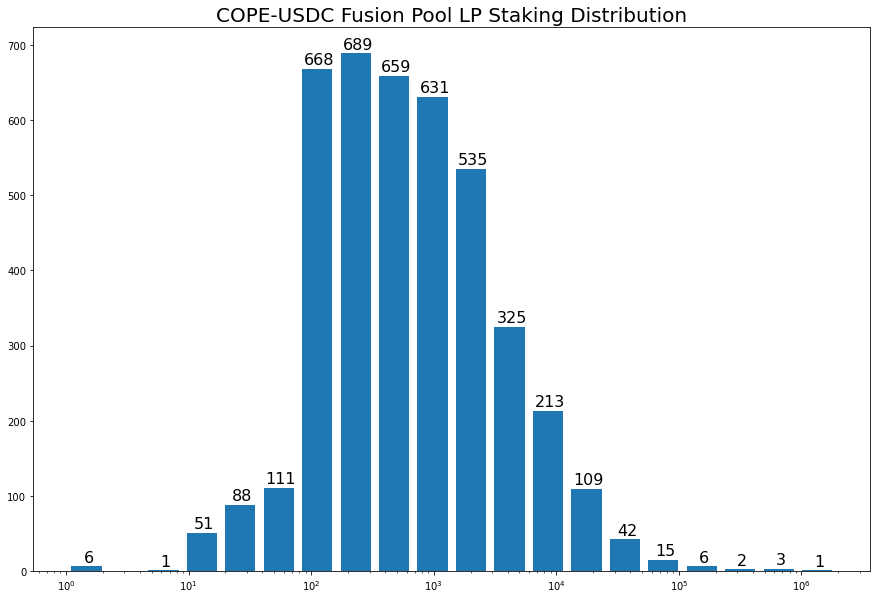

In [27]:
plot_loghist(cope_usdc, 20, "COPE-USDC", number_offset=6)

### Top 20 COPE-USDC Fusion Pool Whales

In [28]:
cope_usdc.nlargest(20, 'Staked COPE-USDC LP amount')

,Staked COPE-USDC LP amount
publicKey,
CuieVDEDtLo7FypA9SbLM9saXFdb1dsshEkyErMqkRQq,1881359.00000
HgMzedC2pNEZ6BwkinwD1QiHYxz4D6gQfzQdoxqjcvsh,1000290.00000
AcKwmcTmMNnD5hWSLAku9PW9PrJkLJcr4RSNav9roGAa,663028.00000
3dBFPCyjRpEu3Z9dTiTrXk3T9nntvecjX1UqNeuancp8,511370.00000
46NAjBDQZMQ3LW6kofZkYug2kLjDeiWW6ewUFAAMsB1S,490958.00000
HtmoTTGrfHnxG7fZ3bh1ZSMa1oqPuLXDxpker4ynXE2y,311819.00000
9PGjxWhx5iARoTz6gwDmDBStFoDq591nCHBRXqXcej2d,230747.00000
B85QgH2CDeHV3Fp2VCZSeTo4ePH3pWSTVEXtVet47WE1,173543.00000
GDqszhod3VavtX3aTkmHnYuHzow9QURK9CeWv6HwFZhV,147313.00000


## MEDIA-USDC

In [29]:
media_usdc = fusion_pool_distros[5].set_index("publicKey")
media_usdc = media_usdc[~media_usdc.index.duplicated(keep='first')]

In [30]:
media_usdc.describe()

,Staked MEDIA-USDC LP amount
count,2591.00000
mean,144.75851
std,1924.21915
min,0.00000
25%,1.92645
50%,6.55649
75%,14.20566
max,70708.04708


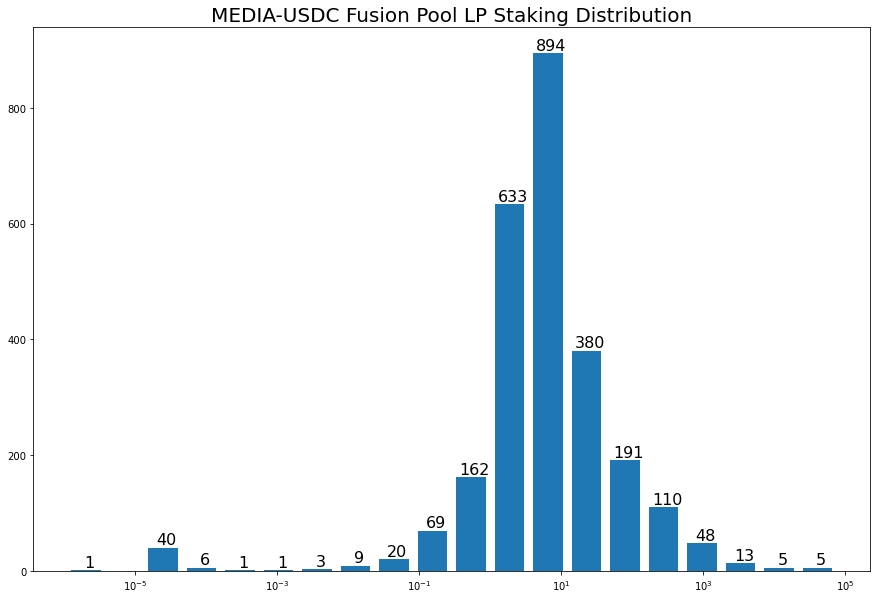

In [31]:
plot_loghist(media_usdc, 20, "MEDIA-USDC", number_offset=6)

### Top 20 MEDIA-USDC Fusion Pool Whales

In [32]:
media_usdc.nlargest(20, 'Staked MEDIA-USDC LP amount')

,Staked MEDIA-USDC LP amount
publicKey,
CuieVDEDtLo7FypA9SbLM9saXFdb1dsshEkyErMqkRQq,70708.04708
4V47jL28QJYsXDbCLd4xLV9byGoX4NwaUC4mepNpnntQ,45740.90892
DSKqiUo59opf8XvbN9FqkFMVE31CaQNjd8hNM7TE1ra9,30960.31148
9iVYJy8nfaN5GpxjZn2PQtqcoTxNXSkxoqSKB2MVPTQR,23908.99473
46NAjBDQZMQ3LW6kofZkYug2kLjDeiWW6ewUFAAMsB1S,21341.15010
EwyVReqQy1bes2qSeWtxNokD51aReiE3T6hws21WBtMb,10753.44606
HQiURCerNRJX1AovZpEiaQ7pP2Rs6RAw6RuoojeSdrHb,9808.10733
8Qnp5yyLq6xPpegsEPcjYNQvqpzASx2Ar9EJhPNf5u38,9063.20509
CqwM3As8VMeHNTsW2uy7EtdVDKDC1ojvL5njt1RcLAaK,7053.30520


## STEP-USDC

In [33]:
step_usdc = fusion_pool_distros[6].set_index("publicKey")
step_usdc = step_usdc[~step_usdc.index.duplicated(keep='first')]

In [34]:
step_usdc.describe()

,Staked STEP-USDC LP amount
count,7640.00000
mean,311.10580
std,5019.49752
min,0.00000
25%,5.82871
50%,20.58913
75%,76.75110
max,285741.45614


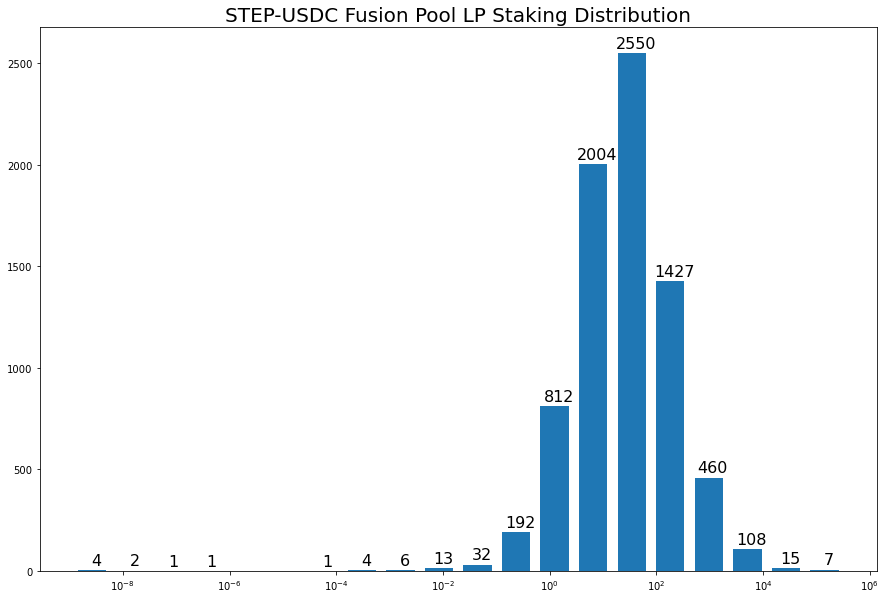

In [35]:
plot_loghist(step_usdc, 20, "STEP-USDC", number_offset=25)

### Top 20 STEP-USDC Fusion Pool Whales

In [36]:
step_usdc.nlargest(20, 'Staked STEP-USDC LP amount')

,Staked STEP-USDC LP amount
publicKey,
Fj3e4P4ARwaWtLVBrt3c7TjstDc55CjKFxv8tg2Po89q,285741.45614
CuieVDEDtLo7FypA9SbLM9saXFdb1dsshEkyErMqkRQq,253048.63665
DSKqiUo59opf8XvbN9FqkFMVE31CaQNjd8hNM7TE1ra9,108240.61393
81isTzQuNaa6J1TBCjkUYWzShiPYiyxfykytgUa6byKF,103310.37763
46NAjBDQZMQ3LW6kofZkYug2kLjDeiWW6ewUFAAMsB1S,80319.87788
3u7ZMu9h3C1KFHL8iS7eXvQaDCoTiV7aW4d3dgrPuY7L,70864.03646
8g8KqH5MmXzWVUQGLzFroYBFJ8ctKKE4tHFibbzJeYRz,62450.55461
A1bQpW1nahTq28gtZtBtLYjhDup4M15PxyPLwgryu3LB,56000.34191
BFxV6vtbT6149fZYeyt79PzRae2qye2vEyVbsu2D5XAQ,29292.52676


## RAY Single-sided Staking

In [37]:
ray_staking_task = asyncio.create_task(amain_stake())
ray_staking_distro = await ray_staking_task

In [38]:
ray_distro = ray_staking_distro.set_index("publicKey")
ray_distro = ray_distro[~ray_distro.index.duplicated(keep='first')]

In [39]:
ray_distro.describe()

,Staked RAY amount
count,52861.00000
mean,226.09691
std,1858.37355
min,0.00000
25%,25.00000
50%,50.01124
75%,100.56609
max,185999.09581


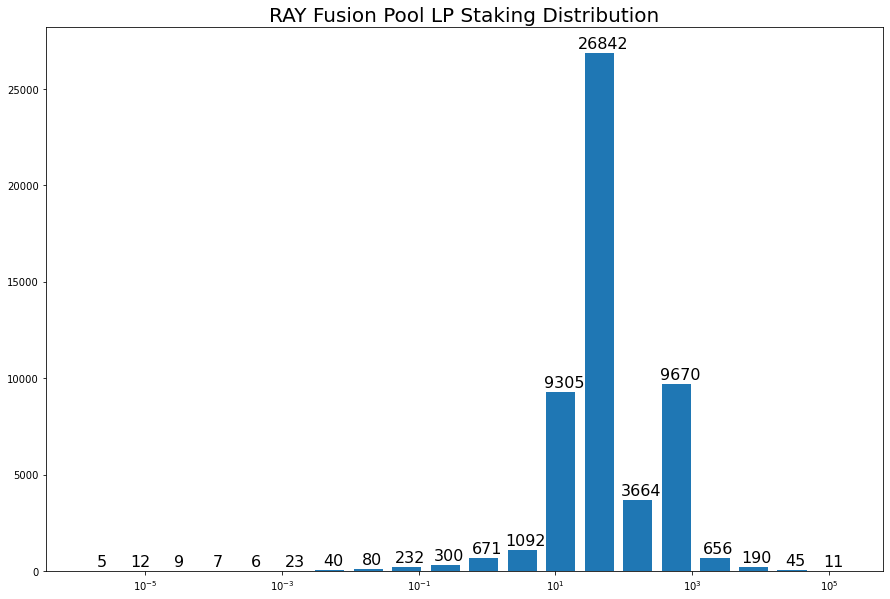

In [40]:
plot_loghist(ray_distro, 20, "RAY", number_offset=250)

### Top 20 RAY Staking Whales

In [41]:
ray_distro.nlargest(20, "Staked RAY amount")

,Staked RAY amount
publicKey,
9tBhvGNV65AdZbZpB37duEFCAp4ke5Yo2wDFEqU5fkx4,185999.09581
Ez2U27TRScksd6q7xoVgX44gX9HAjviN2cdKAL3cFBFE,171359.32330
81isTzQuNaa6J1TBCjkUYWzShiPYiyxfykytgUa6byKF,140000.33992
5as1FyutWkK7t8mGpssGwLFJhm4e7K3RqYFncAwutUJ6,100810.01530
6t6wkuyjUCVtcsh9DP1o9ZS73fEXdrTc32tejSbGRwnx,100102.28514
7VGiJgjKzjxJSRNmdHKx8UfzH29UPwVeAFjB3JYgMy4t,74069.04020
Gme2WZGR9TbqxuQCECP1DLcAumU2rw2HFpPUAhGvJ68V,66406.87458
8pSr6bzRdXLaosKpBmw6WFrZaPGdrybcp1FT691wr2hf,63036.34720
6cwGnWsKwXWEhoJX1aeiiSEUXVEshHb81myUAZmPwJkW,60129.16604


### MER IDO Oversubscription Estimates

In [42]:
ray_gt_50 = ray_distro[ray_distro['Staked RAY amount'] >= 50]

In [43]:
ray_50_count = ray_gt_50.count().values[0]
ray_50_oversub = ray_50_count * 200 / 125000
print("{} addresses qualifies for RAY 50 Pool for MER IDO".format(ray_50_count))
print("Current oversubscription ratio is estimated at {:.2f}x".format(ray_50_oversub))

37357 addresses qualifies for RAY 50 Pool for MER IDO
Current oversubscription ratio is estimated at 59.77x


In [44]:
ray_gt_500 = ray_distro[ray_distro['Staked RAY amount'] >= 500]

In [45]:
ray_500_count = ray_gt_500.count().values[0]
ray_500_oversub = ray_500_count * 600 / 125000
print("{} addresses qualifies for RAY 500 Pool for MER IDO".format(ray_500_count))
print("Current oversubscription ratio is estimated at {:.2f}x".format(ray_500_oversub))

9784 addresses qualifies for RAY 500 Pool for MER IDO
Current oversubscription ratio is estimated at 46.96x
